# Uncertainty propagation with *PyDynamic*

**PyDynamic Version 2015-12-04**

**Author** Sascha Eichstädt (PTB)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Uncertainty propagation for FIR filters

We consider a lowpass filter for which we assume the cut-off frequency to be uncertain. A possible use case can be modeling of an amplifier with low-pass behaviour.

In [3]:
from PyDynamic.misc.testsignals import rect             # rectangular-shaped test signal
from PyDynamic.uncpropagation.FIR import FIRuncFilter   # import unc propagation method
from PyDynamic.misc.filterstuff import kaiser_lowpass   # low pass filter
import PyDynamic.uncpropagation.MonteCarlo as MC        # Monte Carlo methods for comparison
from scipy.signal import lfilter
rst = random.RandomState(1)

### Set up the simulated measurement system

In [4]:
# parameters of simulated measurement
Fs = 100e3
Ts = 1. / Fs

# nominal system parameters
fcut = 20e3
L = 100
b = kaiser_lowpass(L,fcut,Fs)[0]
    
# uncertain knowledge: cutoff between 19.5kHz and 20.5kHz
runs = 1000
FC = fcut + (2*rst.rand(runs)-1)*0.5e3

B = zeros((runs,L+1))
for k in range(runs):
	B[k,:] = kaiser_lowpass(L,FC[k],Fs)[0]
	 
Ub = cov(B,rowvar=0)

### Simulate input signal and calculate filter output

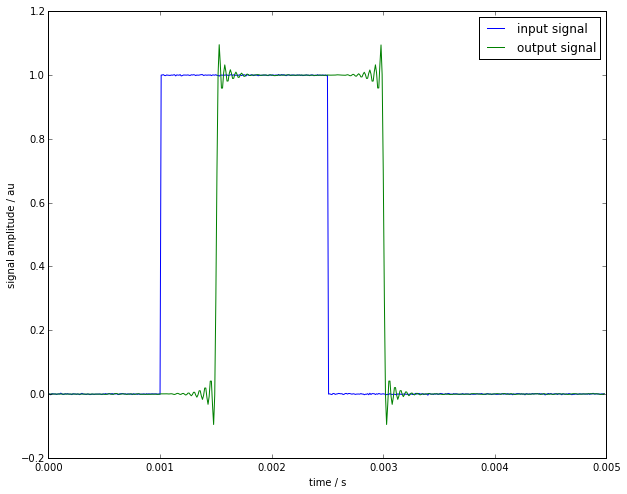

In [6]:
time = arange(0,499*Ts,Ts)
noise = 1e-3
x = rect(time,100*Ts,250*Ts,1.0,noise=noise)
y = lfilter(b,1.0,x)

figure(figsize=(10,8));clf()
plot(time,x,label="input signal")
plot(time,y,label="output signal")
xlabel("time / s"); ylabel("signal amplitude / au")
legend(loc="best");

### Propagate uncertainty associated with filter coefficients

In [5]:
y,Uy = FIRuncFilter(x,noise,b,Ub)

In [6]:
yMC,UyMC = MC.MC(x,noise,b,[1.0],Ub,runs=10000,verbose=False)

/Volumes/Extension/Code/EMPIR SIP/PyDynamic/uncpropagation/MonteCarlo.py:50: RuntimeWarning: covariance is not positive-semidefinite.
  Theta = np.random.multivariate_normal(theta,Uab,runs)


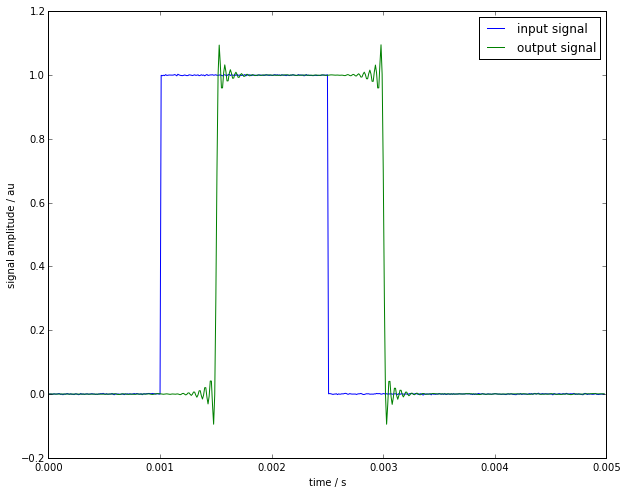

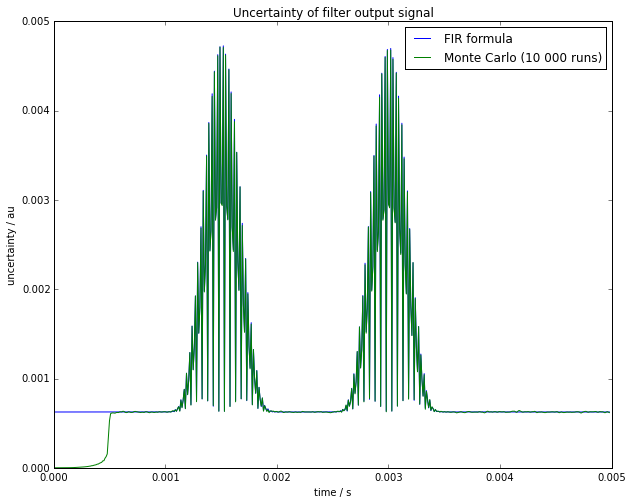

In [7]:
figure(figsize=(10,8));clf()
plot(time,Uy,label="FIR formula")
plot(time,UyMC,label="Monte Carlo (10 000 runs)")
title('Uncertainty of filter output signal')
xlabel("time / s"); ylabel("uncertainty / au")
legend(loc="best");